In [1]:
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
N=25
X= np.reshape(np.linspace(0,0.9,N),(N,1))
Y=np.cos(10*X**2)+ 0.1*np.sin(100*X)

## 1- Linear Regression 

In [3]:


def poly_features(x, k):
    x = x.flatten()
    n = x.shape[0]
    
    #initialize Phi
    phi = np.zeros((n, k+1))
    
    phi = np.zeros((n, k+1)) ## <-- EDIT THIS LINE
    for i in range(n):
        for j in range(k+1):
            phi[i,j]= x[i]**j
    return phi


In [4]:

def nonlinear_features_maximum_likelihood(phi, y):
       
    jitter = 1e-08 # good for numerical stability
    k = phi.shape[1]  

    
    I=np.eye(k)
    a= np.linalg.inv(phi.T @ phi + jitter*I)
    theta_ml = a @ (phi.T @ y) 
  
    
    return theta_ml



In [5]:


def Yprediction(k, xtest,xtrain):
    
    phi = poly_features(xtrain, k) 
    theta_ml = nonlinear_features_maximum_likelihood(phi,Y) # maximum likelihood estimator
    phi_test = poly_features(xtest, k)
    y_pred = phi_test @ theta_ml
    return y_pred 


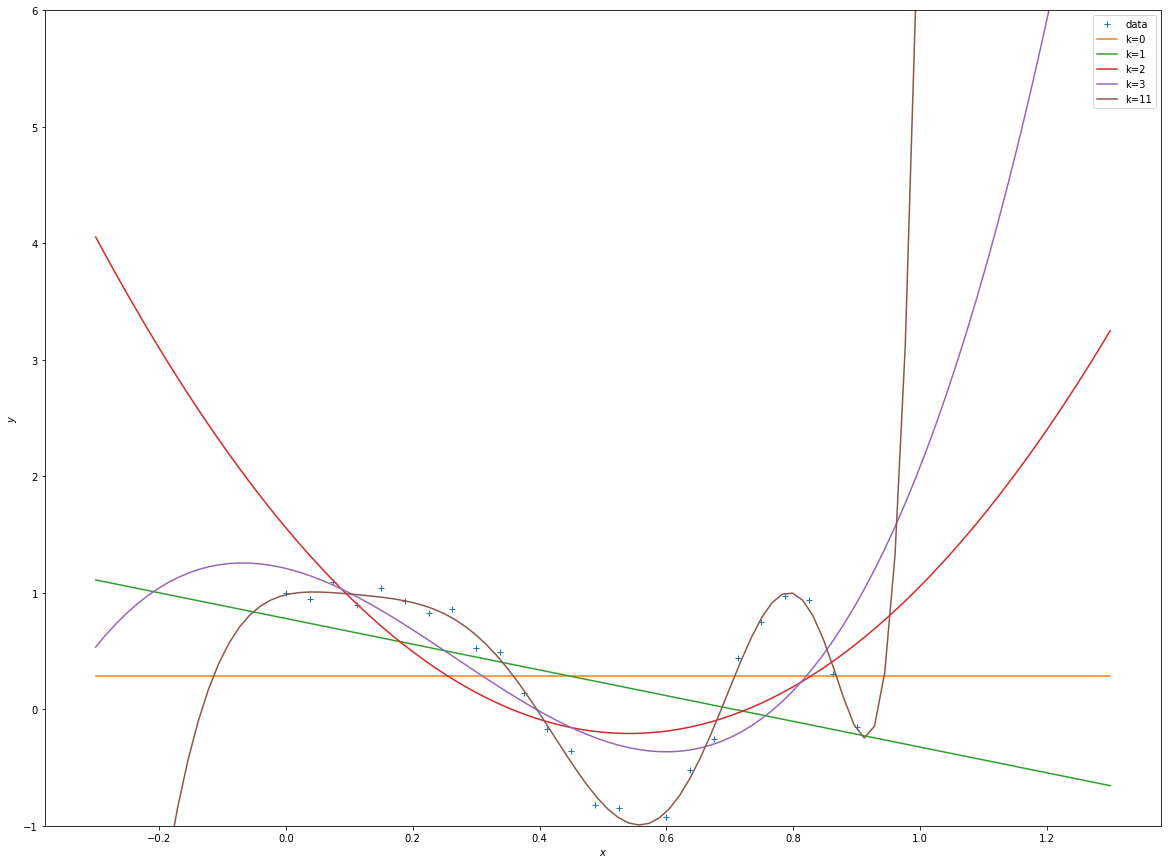

In [6]:

Xtest = np.linspace(-0.3,1.3,100).reshape(-1,1)
Y_pred0=Yprediction(0,Xtest,X)
Y_pred1=Yprediction(1,Xtest,X)
Y_pred2=Yprediction(2,Xtest,X)
Y_pred3=Yprediction(3,Xtest,X)
Y_pred11=Yprediction(11,Xtest,X)

plt.figure(figsize=[20,15])
plt.plot(X, Y, '+')
plt.plot(Xtest, Y_pred0)
plt.plot(Xtest, Y_pred1)
plt.plot(Xtest, Y_pred2)
plt.plot(Xtest, Y_pred3)
plt.plot(Xtest, Y_pred11)
plt.ylim(-1,6)
plt.xlabel("$x$")
plt.ylabel("$y$");
plt.legend(["data", "k=0", "k=1", "k=2", "k=3", "k=11"])



In [7]:


#This function is for trigonometrie basis function
def trigonometrie(X, K):
    
    X = X.flatten()
    N= X.shape[0]
    
    # Compute the feature matrix in stages
    
    Phi = np.zeros((N, 2*K+1))
    for j in range(K+1):
        if (j==0):
            Phi[:,0]= np.ones((N))
        else:
            Phi[:,2*j-1]= np.sin(2*np.pi*j*X)
            Phi[:,2*j]= np.cos(2*np.pi*j*X)

    return Phi



In [8]:


#This function is to compute the prediction with trigonometrie basis function

def Ypredictiontri(k, xtest,xtrain):
    Phi = trigonometrie(xtrain, k) 
    theta_ml = nonlinear_features_maximum_likelihood(Phi,Y) # maximum likelihood estimator
    Phi_test = trigonometrie(xtest, k)
    y_pred = Phi_test @ theta_ml
    return y_pred 



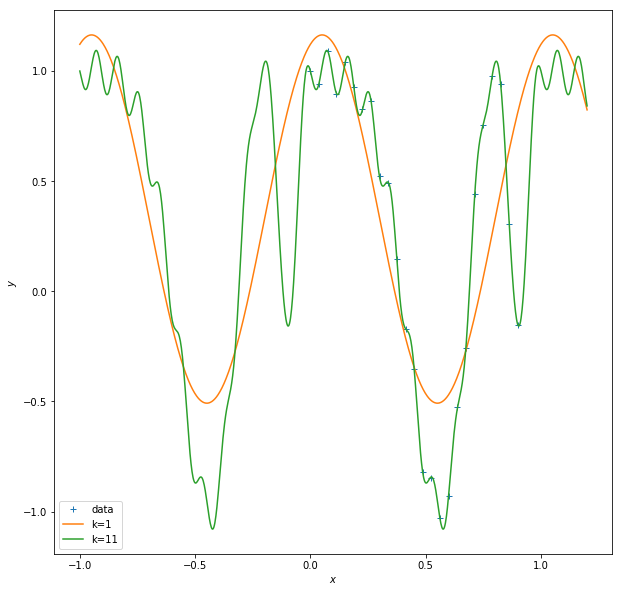

In [9]:

Xtest = np.linspace(-1,1.2,1000).reshape(-1,1)
Y_predtri1=Ypredictiontri(1,Xtest,X)
Y_predtri11=Ypredictiontri(11,Xtest,X)
plt.figure(figsize=[10,10])
plt.plot(X, Y, '+')
plt.plot(Xtest, Y_predtri1)
plt.plot(Xtest, Y_predtri11)
plt.xlabel("$x$")
plt.ylabel("$y$");
plt.legend(["data", "k=1", "k=11"])

In [10]:
# this function will help to divide the dataset during the cross validation

def decompositionDataset(X,i):
    N= X.shape[0]
    Xtrain= np.zeros((N-1))
    Xtest=np.zeros((1))
    k=0
    for j in range(N):
        if j==i:
            Xtest[0]= int(i)
        else:
            Xtrain[k]=int(j)
            k=k+1
        Xtrain=Xtrain.astype(int)
        Xtest=Xtest.astype(int)
    return(Xtrain,Xtest)    



In [11]:
#this function computes the root-mean-squared-error (RMSE) between the y-values predicted 
def RMSE(y, ypred):
    N= len(y)
    S= (1/N)*(np.sum((y-ypred)**2))
    rmse = np.sqrt(S) 
    return rmse


In [12]:
#Cross validation  in K iterations
def RMSEE(Kmax,X1):
    N= X1.shape[0]
    tab1= np.ones((N))
    tab2= np.ones((N))
    sigma= np.ones((Kmax))
    MLE= np.ones((Kmax))
    RMSEE =np.ones((Kmax))
    for k in range(Kmax):
        for i in range(N):
            xtrain,xtest= decompositionDataset(X1,i)
            
            Xtrain=X1[xtrain]
            Xtest=X1[xtest]
            
            Phitrain=trigonometrie(Xtrain, k)
            Phitest=trigonometrie(Xtest, k)
            
            Ytrain= Y[xtrain]
            ytest=Y[xtest]
            
            theta_ml= nonlinear_features_maximum_likelihood(Phitrain,Ytrain)
            
            ypred = Phitest @ theta_ml
            tab1[i]=ytest
            tab2[i]=ypred
            
        rmse= RMSE(tab1, tab2)
        RMSEE[k]= rmse
        Phite= trigonometrie(X1, k)
        teta= nonlinear_features_maximum_likelihood(Phite,Y)
        sigma[k]= Y.T @ Y + teta.T @ Phite.T @ Phite @ teta - 2* Y.T @ Phite @ teta
    
    return RMSEE,sigma


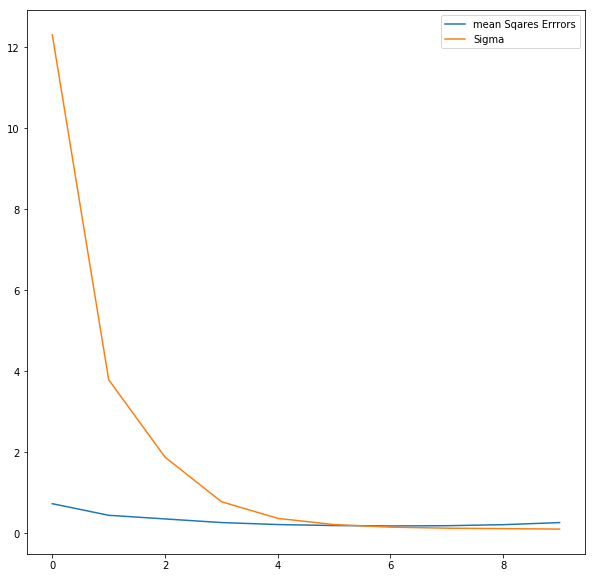

In [13]:
# plot
K=10
Kmax=range(K)
Errors, Sigma = RMSEE(K,X)
plt.figure(figsize=[10,10])
plt.plot(Kmax,Errors)
plt.plot(Kmax,Sigma)
plt.legend(["mean Sqares Errrors","Sigma"])
            

## 2- Bridge regression

In [15]:
def Gaussian_features(X, K):
    l=0.1
    mu=np.linspace(0,1,K).reshape(-1,1)
    X = X.flatten()
    N = X.shape[0]
    
    #initialize Phi
    Phi = np.zeros((N, K+1))
    # Compute the feature matrix in stages
    for j in range(K+1):
            if (j==0):
                Phi[:,j]=np.ones(N)
            else:
                Phi[:,j]=np.exp(-(X-mu[j-1])**2/(2*l**2))
            
    return Phi

In [16]:
#compute Maximum A posteriori
def map_estimate_poly(Phi, y, K,lamda):
    I=np.eye(K+1)
    a=np.linalg.inv(Phi.T @ Phi +lamda*I)
    theta_map = a @ (Phi.T @ y)
    
    return theta_map

In [17]:
Xtest= np.linspace(-0.3,1.3,900).reshape(-1,1)
print(Xtest.shape)
Ytest=np.cos(10*Xtest**2)+ 0.1*np.sin(100*Xtest)

(900, 1)


In [18]:
#This function is to compute the prediction with Gaussian basis function
def Ypredictgauss(k, xtest,ytest,lamda):
    Phi = Gaussian_features(X, k) # N x (K+1) feature matrix
    Phi_test = Gaussian_features(xtest, k)
    theta_map = map_estimate_poly(Phi_test, ytest, k,lamda) # maximum Aposteriori estimaton
    y_pred = Phi_test @ theta_map
    return y_pred 

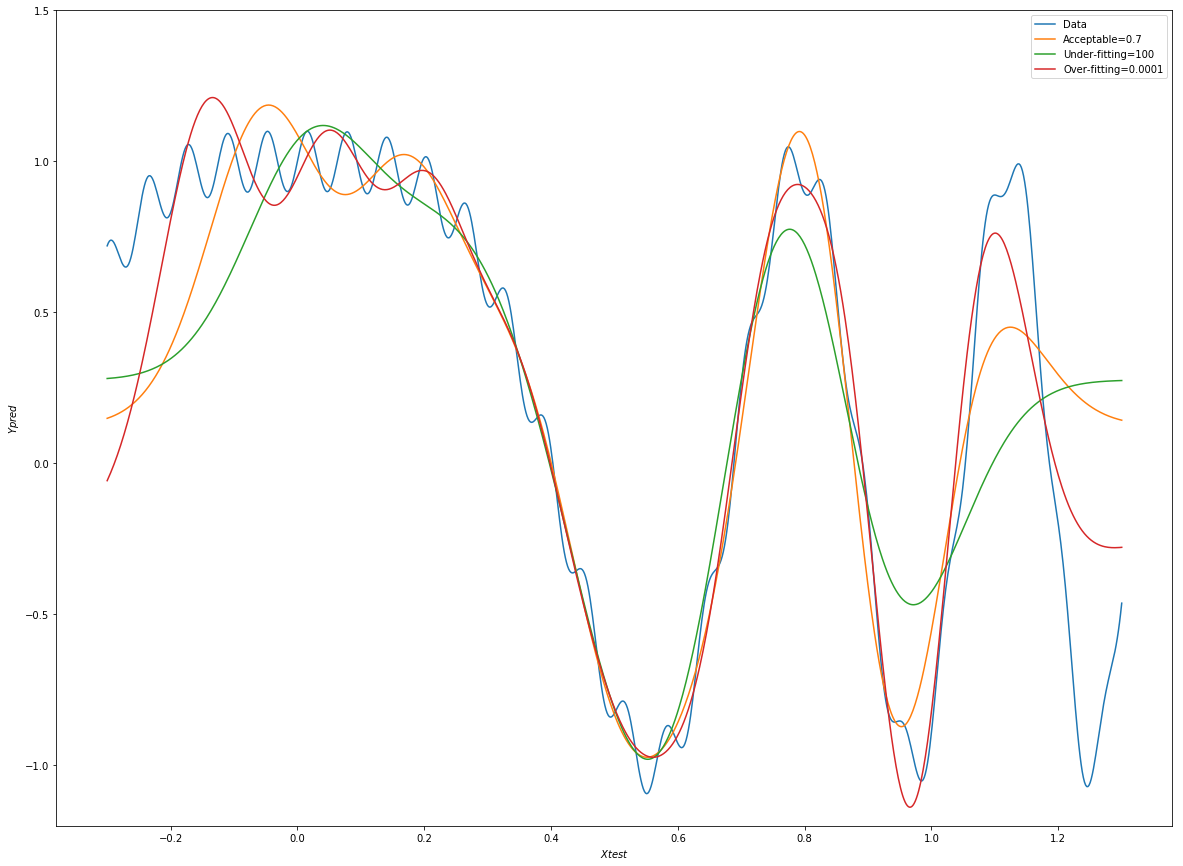

In [19]:
K=200
lamda1= 0.7
lamda2= 100
lamda3= 0.0001
Ypredit1= Ypredictgauss(K, Xtest,Ytest,lamda1)
Ypredit2= Ypredictgauss(K, Xtest,Ytest,lamda2)
Ypredit3= Ypredictgauss(K, Xtest,Ytest,lamda3)


plt.figure(figsize=[20,15])
plt.plot(Xtest, Ytest,)
plt.plot(Xtest, Ypredit1)
plt.plot(Xtest, Ypredit2)
plt.plot(Xtest, Ypredit3)
plt.ylim(-1.2,1.5)
plt.xlabel("$Xtest$")
plt.ylabel("$Ypred$");
plt.legend(["Data", "Acceptable=0.7", "Under-fitting=100","Over-fitting=0.0001"])

## 3- Bayesian Linear regression

In [20]:
#function log marginal likelihood
def lml(alpha, beta,Phi,Y):
    N= Phi.shape[0]
    #N=Y
    I= np.eye((N))
    K= alpha*Phi @ Phi.T + beta*I
    lml= (-1/2)* Y.T @ np.linalg.inv(K) @ Y - (1/2)* (np.log(np.linalg.det(K))) - (N/2)* np.log(2*(np.pi))
    return lml


In [21]:
#function compute the gradient of log marginal likelihood
def grad_lml(alpha, beta,Phi,Y):
   
    N= Phi.shape[0]
    I= np.eye((N))
    K= alpha*Phi @ Phi.T + beta*I
    A= np.linalg.inv(K)
    grad_alpha= (1/2)*(Y.T @ A @ (Phi @ Phi.T) @ A @ Y ) -(1/2)* np.trace(A @ (Phi @ Phi.T))
    grad_beta=  (1/2)*((Y.T @ A @ A @ Y ) -(1/2)*np.trace(A))
    
    return(grad_alpha, grad_beta )

In [22]:
#function compute the gradient dessent
def gradient_dessent(alpha0, beta0,phi,y,Nummax,gamma):
    
    gradient= grad_lml(alpha0,beta0,phi,y)
    Tab_Alpha=np.array([alpha0])
    Tab_beta=np.array([beta0])
    i=1
    while ((i < Nummax)):
        alpha= Tab_Alpha[i-1] + gamma*gradient[0]
        beta= Tab_beta[i-1] + gamma*gradient[1]
        gradient= grad_lml(alpha,beta,phi,y)
        Tab_Alpha=np.append(Tab_Alpha,alpha)
        Tab_beta=np.append(Tab_beta,beta)
        loss_alpha= Tab_Alpha[i]-Tab_Alpha[i-1]
        loss_beta= Tab_beta[i]-Tab_beta[i-1]
        i=i+1
    return (Tab_Alpha, Tab_beta)


In [23]:
#compute the Maximum likelihood with trigonometric basis function 
k=12
Phi= trigonometrie(X, k)
Alpha,beta= gradient_dessent(1, 1.1,Phi,Y,k,0.01)


In [24]:
Alpha,beta

(array([ 1.        ,  0.89375169,  0.77645815,  0.64396517,  0.48877178,
         0.2946895 ,  0.01269024, -0.62340615, -0.38312447,  0.08448905,
        -0.44509855, -0.06926771]),
 array([1.1       , 1.09376789, 1.08712292, 1.07992273, 1.07191823,
        1.06259954, 1.05060751, 1.04576824, 1.05383845, 1.07397715,
        1.05799479, 1.07297135]))